In [42]:
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd
from sklearn import metrics

In [43]:
df= pd.read_csv('user_data.csv')

In [44]:
x= df.iloc[:, [2,3]].values 
y= df.iloc[:, 4].values

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)

In [46]:
from sklearn.preprocessing import StandardScaler 
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train) 
x_test= st_x.transform(x_test)

In [47]:
from sklearn.svm import SVC 
classifier = SVC(kernel='linear', random_state=0) 
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [48]:
y_pred= classifier.predict(x_test)
y_pred

array([0, 0, 0, 1, 0], dtype=int64)

In [50]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm

array([[4, 0],
       [0, 1]], dtype=int64)

C:\Users\Khumesh Lohar\AppData\Local\Temp\ipykernel_10780\3470158118.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  for i, j in enumerate(nm.unique(y_set)): mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


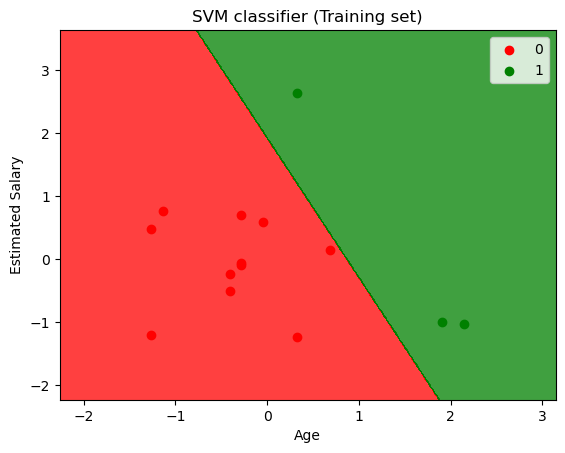

In [55]:
from matplotlib.colors import ListedColormap 
x_set, y_set = x_train, y_train
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step =0.01), 
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), 
alpha = 0.75, cmap = ListedColormap(('red', 'green')))
mtp.xlim(x1.min(), x1.max())
mtp.ylim(x2.min(), x2.max())
for i, j in enumerate(nm.unique(y_set)): mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
c = ListedColormap(('red', 'green'))(i), label = j) 
mtp.title('SVM classifier (Training set)') 
mtp.xlabel('Age')
mtp.ylabel('Estimated Salary') 
mtp.legend()
mtp.show()

C:\Users\Khumesh Lohar\AppData\Local\Temp\ipykernel_10780\2543212991.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  mtp.scatter(x_set[y_set == j, 0],


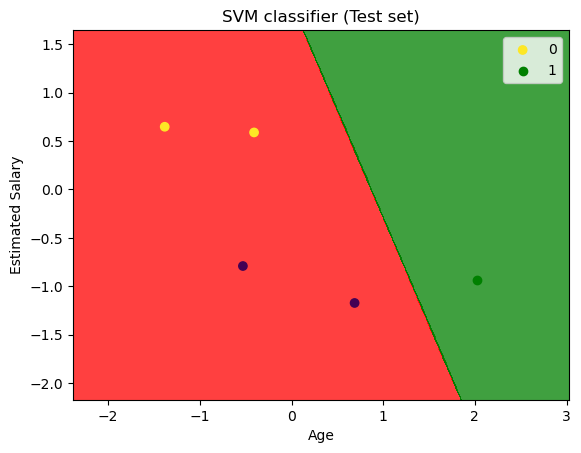

In [59]:
from matplotlib.colors import ListedColormap 
x_set, y_set = x_test, y_test
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step =0.01), nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha = 0.75, cmap = ListedColormap(('red','green' )))
mtp.xlim(x1.min(), x1.max())
mtp.ylim(x2.min(), x2.max())
for i, j in enumerate(nm.unique(y_set)):
    
    mtp.scatter(x_set[y_set == j, 0], 
            x_set[y_set == j, 1], 
            c = ListedColormap(('red', 'green'))(i), label = j)
mtp.title('SVM classifier (Test set)') 
mtp.xlabel('Age') 
mtp.ylabel('Estimated Salary') 
mtp.legend()
mtp.show()

In [60]:
accuracy = metrics.accuracy_score(y_test,y_pred) 
report = metrics.classification_report(y_test,y_pred) 
cm = metrics.confusion_matrix(y_test,y_pred)
print("Classification report:") 
print("Accuracy: ", accuracy) 
print(report)
print("Confusion matrix:") 
print(cm)

Classification report:
Accuracy:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

Confusion matrix:
[[4 0]
 [0 1]]
